In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np

In [10]:
plt.rc('figure', dpi=100)

In [5]:
path = '../gapipes/data/DR2_RUWE_V1/'
d = pd.read_csv(path+'table_u0_g_col.txt', skipinitialspace=True)
print(len(d), 'rows')
d.head()

193251 rows


,g_mag,bp_rp,u0
0,3.6,-1.0,19.507680
1,3.6,-0.9,19.254451
2,3.6,-0.8,18.999339
3,3.6,-0.7,18.742264
4,3.6,-0.6,18.483146


In [6]:
Nx, Ny = d['bp_rp'].unique().size, d['g_mag'].unique().size
print('array sizes for bp_rp and g_mag', Nx, Ny)

array sizes for bp_rp and g_mag 111 1741


In [8]:
# re-arrange to visualize
x = d['bp_rp'].sort_values().unique()
y = d['g_mag'].sort_values().unique()
u0_2d = d.sort_values(['bp_rp', 'g_mag'])['u0'].values.reshape((Nx, Ny))

dx, dy = x[1] - x[0], y[1] - y[0]
x1 = np.linspace(x[0]-dx*0.5, x[-1]+dx*0.5, Nx+1)
y1 = np.linspace(y[0]-dy*0.5, y[-1]+dy*0.5, Ny+1)

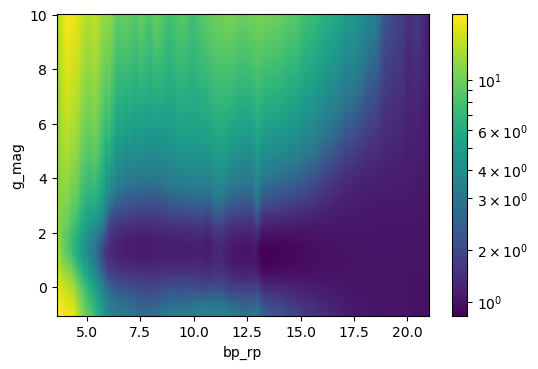

In [11]:
plt.pcolormesh(y1, x1, u0_2d, norm=colors.SymLogNorm(3))
plt.colorbar();
plt.xlabel('bp_rp')
plt.ylabel('g_mag');

In [12]:
# u0(g_mag) for when bp_rp is not available.
d1 = pd.read_csv(path+'table_u0_g.txt', skipinitialspace=True)
len(d1)

1741

In [13]:
d1.head()

,g_mag,u0
0,3.60,13.700618
1,3.61,13.658286
2,3.62,13.611140
3,3.63,13.566437
4,3.64,13.522798


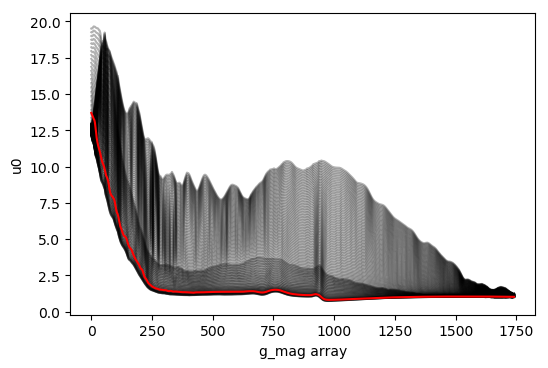

In [14]:
plt.plot(u0_2d.T, 'k-', alpha=.3);
plt.plot( d1['u0'], 'r-')
plt.xlabel('g_mag array');
plt.ylabel('u0');

19 bp_rp =  0.9


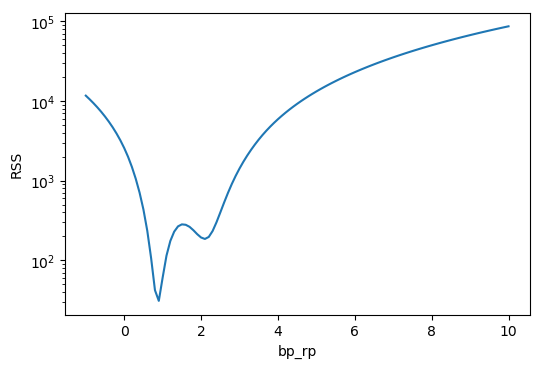

In [15]:
# find bp_rp that matches d1 curve closest
# so that when bp_rp is missing, we subsitute it to this value and use the same interpolator
imin = np.sum((d1['u0'].values[None,:]-u0_2d)**2, axis=1).argmin()
plt.plot(x, np.sum((d1['u0'].values[None,:]-u0_2d)**2, axis=1))
plt.yscale('log')
plt.xlabel('bp_rp')
plt.ylabel('RSS')
print(imin, 'bp_rp = ', x[imin])

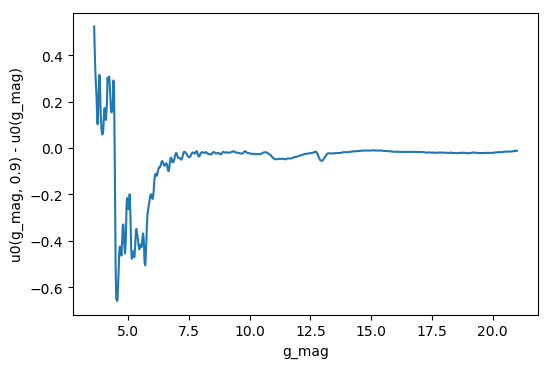

In [16]:
plt.plot(y, u0_2d[19]-d1['u0'].values)
plt.ylabel('u0(g_mag, 0.9) - u0(g_mag)')
plt.xlabel('g_mag');

Difference is probably safe to ignore.

In [121]:
from scipy.interpolate import NearestNDInterpolator

In [122]:
interp = NearestNDInterpolator(d[['bp_rp', 'g_mag']].values, d['u0'].values)